In [303]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [304]:
#Create a function for each defects where each function receive an bottle image with one or more defects.
"""
Defect list: 
CONTENT_HIGH ok,
CONTENT_LOW ok,
COVER_NONE ok,
LABEL_WHITE  ok,
BOTTLE_NONE ok ,
LABEL_NONE ok,
BOTTLE_SMASHED ok ,
LABEL_MISPLACED ok,
"""

'\nDefect list: \nCONTENT_HIGH ok,\nCONTENT_LOW ok,\nCOVER_NONE ok,\nLABEL_WHITE  ok,\nBOTTLE_NONE ok ,\nLABEL_NONE ok,\nBOTTLE_SMASHED ok ,\nLABEL_MISPLACED ok,\n'

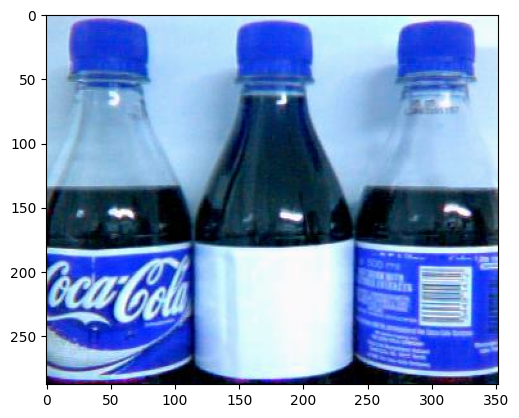

In [305]:
img = cv2.imread("train/train_67.jpg")

plt.imshow(img, cmap='gray')

In [306]:
def split_image(img, y_start, plot=False):

    image = img
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    height, width = image.shape

    # Calculate the split points for both width and height
    split_point1_width = width // 3
    split_point2_width = 2 * width // 3
    split_point1_height = height // 2


    # Split the image into three parts
    part1 = image[y_start:split_point1_height, :split_point1_width]
    part2 = image[y_start:split_point1_height, split_point1_width:split_point2_width]
    part3 = image[y_start:split_point1_height, split_point2_width:]

    if plot:
        
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(part1, cv2.COLOR_BGR2RGB))
        plt.title('Part 1')
    
        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(part2, cv2.COLOR_BGR2RGB))
        plt.title('Part 2')
    
        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(part3, cv2.COLOR_BGR2RGB))
        plt.title('Part 3')
        
        plt.show()

    return part1, part2, part3


In [307]:
def segmentation(img, plot=False):
    _, image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    if plot:
        plt.imshow(image, cmap='gray')
        plt.show()
        
    return image

In [308]:
def mean_of_roi(img, row_start, row_end, col_start, col_end, target, is_high, print_result=False):
    roi = img[row_start:row_end, col_start:col_end]
    mean = np.mean(roi)
    
    if print_result:
        print("Mean value based on ROI: ",mean)
 
    if is_high:
        if mean < target:
            return 1
        return 0
    else:
        if mean > target:
            return 1
        return 0

<h3>Detect high content</h3>

In [309]:
def check_high_content(img):
    res = []
    imgs = split_image(img, y_start=60)

    for img_piece in imgs:
        segmented_img = segmentation(img_piece)
        res.append(segmented_img)

    return mean_of_roi(res[1], 60,75, 40,60, target=60, is_high=True)


In [310]:
for i  in range(1):
    
    IMG_PATH = (f"train/train_22.jpg")
    img = cv2.imread(IMG_PATH)
    print(check_high_content(img))


0


<h3>Detect Low content</h3>

In [311]:
def check_low_content(img):
    imgs = split_image(img, y_start=60)
 
    segmented_img = segmentation(imgs[1])

    return mean_of_roi(segmented_img, 80,84, 75,80, target=240, is_high=False)

In [312]:

for i in range (5): 

    img2 = cv2.imread(f'images/{i+1}.jpg')
    print(check_low_content(img2))

0
1
0
0
0


<h3>Detect Cover</h3>

In [313]:
def check_cover(img):
    img = split_image(img, y_start=0, plot=False)

    img_ = segmentation(img[1], plot=False)

    res = mean_of_roi(img=img_,row_start=15, row_end=30, col_start=60, col_end=75, print_result=False, target=240, is_high=False) 

    return res
 

In [314]:
for i in range (6): 

    img = cv2.imread(f"images/{i+1}.jpg")
    print(check_cover(img))

0
0
0
0
0
1


<h3>White label</h3>

In [315]:
def check_white_label(img):
    res = segmentation(img, plot=False)
    return mean_of_roi(res, row_start=200, row_end=280, col_start=150, col_end=200, is_high=False, target=230, print_result=False)

In [316]:
for i in range (6): 

    img = cv2.imread(f"images/{i+1}.jpg")
    print(check_white_label(img))

0
0
0
0
1
0


<h3>Bottle None</h3>

In [317]:
def check_bottle_none(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    res = segmentation(gray, plot=False)
    return mean_of_roi(res, row_start=160, row_end=180, col_start=150, col_end=200, target=250, print_result=True, is_high=False)

In [318]:

for i in range (7): 
    img = cv2.imread(f"images/{i+1}.jpg")
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(check_bottle_none(img))

Mean value based on ROI:  2.805
0
Mean value based on ROI:  149.43
0
Mean value based on ROI:  0.0
0
Mean value based on ROI:  0.51
0
Mean value based on ROI:  45.645
0
Mean value based on ROI:  16.065
0
Mean value based on ROI:  255.0
1


<h3>Label None</h3>

In [319]:
def check_label_none(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    res = segmentation(img, plot=False)
    return mean_of_roi(res, row_start=200, row_end=280, col_start=150, col_end=200, is_high=True, target=10, print_result=False)

1

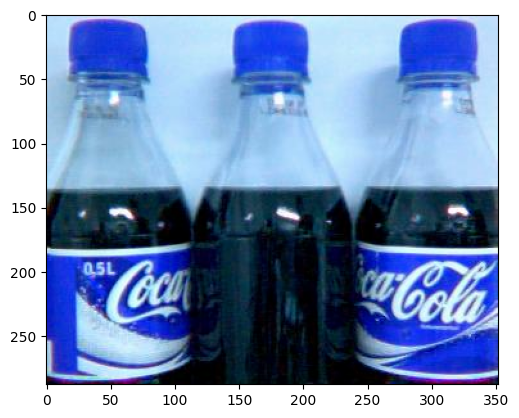

In [320]:
img = cv2.imread(f"images/{8}.jpg")
plt.imshow(img)
check_label_none(img)

<h3>Bottle Smashed<h3>

In [321]:
def check_bottle_smashed(img):
    def get_contour(img, left=True):
        if left:
            return img[10:210, 125:130]
        else:
            return img[120:200, 245:250]

    def verify(img):
        img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        threshold = 100
        _, img_bin = cv2.threshold(img_bw, threshold, 255, cv2.THRESH_BINARY)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        lower_red = np.array([0, 100, 100])  
        upper_red = np.array([10, 255, 255])  

        mask_red = cv2.inRange(img_hsv, lower_red, upper_red)
        img_bin[mask_red == 255] = 0
        img_bin[img_bw == 0] = 0

        return 1 if not np.any(img_bin == 0) else 0

    left_bottle = get_contour(img, left=True)
    right_bottle = get_contour(img, left=False)

    return verify(left_bottle) or verify(right_bottle)

In [322]:
img_test = cv2.imread('images/4.jpg')

print(check_bottle_smashed(img_test))


1


<h3>Label Misplaced</h3>

In [323]:
def check_label_misplaced(img):
    
    if check_label_none(img) == 1:
        return 0
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # plt.imshow(img, cmap='gray')
    
    y1, y2 = 170, 210
    x1,x2 = 100,225
    cropped = img[y1:y2, x1:x2]
    # plt.imshow(cropped, cmap='gray')
    
    mean_intensity = cv2.mean(cropped)[0]

    print(mean_intensity)
    return 1 if mean_intensity < 80 else 0

In [324]:
img = cv2.imread('train/train_3.jpg')

for i in range (7): 
    img = cv2.imread(f"train/train_{i+1}.jpg")
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(check_label_misplaced(img))



116.0386
0
96.1692
0
40.216
1
104.0368
0
107.02860000000001
0
92.5976
0
113.5824
0


In [325]:
def check_defects(bottle, df, filename):
    cols = ["filename", "CONTENT_HIGH", "CONTENT_LOW", "COVER_NONE", "BOTTLE_SMASHED", "LABEL_WHITE", "LABEL_MISPLACED", "LABEL_NONE", "BOTTLE_NONE"]
    row = {"filename": filename}
    defects = [0, 0, 0, 0, 0, 0, 0, 0]

  
    if check_bottle_none(bottle) == 1:
        row["BOTTLE_NONE"] = 1
        defects[7] = 1

    if check_label_none(bottle) == 1:
        row["LABEL_NONE"] = 1
        defects[6] = 1

    for col in cols[1:]:
        if not "BOTTLE_NONE" in row:
            if col == "CONTENT_HIGH":
                if check_high_content(bottle) == 1:
                    row[col] = 1
                    defects[0] = 1
            elif col == "CONTENT_LOW":
                if check_low_content(bottle) == 1:
                    row[col] = 1
                    defects[1] = 1
            elif col == "COVER_NONE":
                if check_cover(bottle) == 1:
                    row[col] = 1
                    defects[2] = 1
            elif col == "BOTTLE_SMASHED":
                if check_bottle_smashed(bottle) == 1:
                    row[col] = 1
                    defects[3] = 1
            elif col == "LABEL_WHITE" and not "LABEL_NONE" in row:
                if check_white_label(bottle) == 1:
                    row[col] = 1
                    defects[4] = 1
            elif col == "LABEL_MISPLACED" and not "LABEL_NONE" in row and not "LABEL_WHITE" in row:
                if check_label_misplaced(bottle) == 1:
                    row[col] = 1
                    defects[5] = 1

   
    new_row_df = pd.DataFrame([row])
    df = pd.concat([df, new_row_df], ignore_index=True)
    
    return np.array(defects), df


In [326]:
def main():
    columns = ["filename", "CONTENT_HIGH", "CONTENT_LOW", "COVER_NONE", "BOTTLE_SMASHED", "LABEL_WHITE", "LABEL_MISPLACED", "LABEL_NONE", "BOTTLE_NONE"]
    df = pd.DataFrame(columns=columns)
    
    defects_arr = []
    
    for i in range(1, 78):
        filename = f"train_{i}.jpg"

        bottle = cv2.imread(f"train/train_{i}.jpg")
        
        defects, df = check_defects(bottle, df, filename)
        
        defects_arr.append(defects)

    #df.to_csv("result.csv", index=False)
    return defects_arr

In [327]:
main()

Mean value based on ROI:  0.0
116.0386
Mean value based on ROI:  0.0
96.1692
Mean value based on ROI:  16.065
40.216
Mean value based on ROI:  20.91
104.0368
Mean value based on ROI:  23.97
107.02860000000001
Mean value based on ROI:  25.5
92.5976
Mean value based on ROI:  0.0
113.5824
Mean value based on ROI:  0.255
106.45700000000001
Mean value based on ROI:  255.0
Mean value based on ROI:  14.28
87.72760000000001
Mean value based on ROI:  0.0
104.86800000000001
Mean value based on ROI:  30.09
99.1654
Mean value based on ROI:  255.0
Mean value based on ROI:  0.0
Mean value based on ROI:  0.0
113.8048
Mean value based on ROI:  45.645
Mean value based on ROI:  255.0
Mean value based on ROI:  4.845
115.864
Mean value based on ROI:  2.805
65.8508
Mean value based on ROI:  0.0
104.677
Mean value based on ROI:  0.51
105.5908
Mean value based on ROI:  153.0
108.45840000000001
Mean value based on ROI:  37.23
Mean value based on ROI:  8.67
103.587
Mean value based on ROI:  0.0
104.1166
Mean v

[array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 1, 0, 0]),
 array([1, 0, 1, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 1]),
 array([1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 1]),
 array([1, 0, 0, 1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 

In [328]:
res = pd.read_csv("result.csv")
res = res.fillna(0)

 

res = res.rename(columns={'filename': 'id'})


res.to_csv("result1.csv", index=False)

res.head()

,id,CONTENT_HIGH,CONTENT_LOW,COVER_NONE,BOTTLE_SMASHED,LABEL_WHITE,LABEL_MISPLACED,LABEL_NONE,BOTTLE_NONE
0,train_1.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train_2.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train_3.jpg,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,train_4.jpg,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,train_5.jpg,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
